In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfs = []
for name in ["results_mixed_new_0.csv", "results_mixed_new_1.csv", "results_mixed_infidelity.csv", "results_mixed_0_2.csv", "results_mixed_1_3.csv"]:
    df = pd.read_csv(name)
    # Replace all the Nans with 0s
    df = df.fillna(0)
    dfs.append(df)
# df1 = pd.read_csv('results_mixed_new_0.csv')
# # Replace all the Nans with 0s
# df1 = df1.fillna(0)

# df2 = pd.read_csv('results_mixed_new_1.csv')
# # Replace all the Nans with 0s
# df2 = df2.fillna(0)

# Concatenate the two dataframes
df = pd.concat(dfs, ignore_index=True)

df = df[df["Dataset"] == "Imagenettewoof"]

In [29]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()
mixing_methods = df["Mixing Method"].unique()

In [30]:
print("Methods:", methods)
print("Layers:", layers)
print("Metrics:", metrics)
print("Upscale Methods:", upscale_methods)
print("Mixing Methods:", mixing_methods)

Methods: ['GradCAMPlusPlus']
Layers: ['features.20' 'features.15' 'features.10' 'features.5']
Metrics: ['average_drop' 'insertion_curve_AUC' 'deletion_curve_AUC' 'infidelity'
 'road_combined']
Upscale Methods: ['ERFUpsamplingFast' 'bilinearUpsampling']
Mixing Methods: [0 'MultiplierMix']


In [31]:
df

,Image Index,Label,Predicted Label,Model,Dataset,Attribution Method,Layer,Metric,Upscale Method,Mixing Method,Value
0,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,average_drop,ERFUpsamplingFast,0,52.603626
1,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,average_drop,ERFUpsamplingFast,MultiplierMix,52.603626
2,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,average_drop,ERFUpsamplingFast,0,52.603626
3,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,average_drop,ERFUpsamplingFast,MultiplierMix,52.603626
4,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,insertion_curve_AUC,ERFUpsamplingFast,0,0.999801
...,...,...,...,...,...,...,...,...,...,...,...
80036,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.15,road_combined,bilinearUpsampling,MultiplierMix,0.292761
80037,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,0,0.039605
80038,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,MultiplierMix,0.313527
80039,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.5,road_combined,bilinearUpsampling,0,-0.040197


In [21]:
import sys
sys.path.append('../')

from models import vgg11_Imagenettewoof, vgg_preprocess
import torch
from data import imagenettewoof
model = vgg11_Imagenettewoof()
# Load weights
model.load_state_dict(torch.load("VGG11_Imagenettewoof.pt", map_location='cpu'))

# test_data = imagenettewoof(root="../data", split="test", size="320px", download=False, transform=vgg_preprocess)

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['MaxPool2d']
{'features.20': 'MaxPool2d', 'features.15': 'MaxPool2d', 'features.10': 'MaxPool2d', 'features.5': 'MaxPool2d'}


In [22]:
df[(df["Upscale Method"] == "ERFUpsamplingFast")].groupby(["Mixing Method", "Layer","Metric"]).agg({"Value": ["mean","std", "count"]}).reset_index()

Mixing Method        Layer               Metric      Value             \
                                                          mean        std   
0               0  features.10         average_drop  49.230407  38.553546   
1               0  features.10   deletion_curve_AUC   0.218583   0.203713   
2               0  features.10  insertion_curve_AUC   0.581226   0.346732   
3               0  features.15         average_drop  28.860404  34.593651   
4               0  features.15   deletion_curve_AUC   0.185128   0.210008   
5               0  features.15  insertion_curve_AUC   0.614798   0.347573   
6               0  features.20         average_drop  21.503438  31.488477   
7               0  features.20   deletion_curve_AUC   0.189604   0.209920   
8               0  features.20  insertion_curve_AUC   0.618519   0.349425   
9               0   features.5         average_drop  63.977189  37.614865   
10              0   features.5   deletion_curve_AUC   0.253854   0.198463   
11              0   features.5  insertion_curve_AUC   0.602110   0.354355   
12  MultiplierMix  features.10         average_drop  59.217002  39.594031   
13  MultiplierMix  features.10   deletion_curve_AUC   0.180808   0.204573   
14  MultiplierMix  features.10  insertion_curve_AUC   0.619187   0.349980   
15  MultiplierMix  features.15         average_drop  35.618125  38.204946   
16  MultiplierMix  features.15   deletion_curve_AUC   0.181250   0.207853   
17  MultiplierMix  features.15  insertion_curve_AUC   0.621281   0.348786   
18  MultiplierMix  features.20         average_drop  21.503438  31.488477   
19  MultiplierMix  features.20   deletion_curve_AUC   0.189604   0.209920   
20  MultiplierMix  features.20  insertion_curve_AUC   0.618519   0.349425   
21  MultiplierMix   features.5         average_drop  76.346695  33.713878   
22  MultiplierMix   features.5   deletion_curve_AUC   0.187473   0.206397   
23  MultiplierMix   features.5  insertion_curve_AUC   0.623873   0.352703   

          
   count  
0   1000  
1   1000  
2   1000  
3   1001  
4   1000  
5   1000  
6   1003  
7   1001  
8   1002  
9   1000  
10  1000  
11  1000  
12  1000  
13  1000  
14  1000  
15  1000  
16  1000  
17  1000  
18  1003  
19  1001  
20  1002  
21  1000  
22  1000  
23  1000

In [23]:
df_correct = df[df["Predicted Label"] == df["Label"]]
print(len(df), len(df_correct))

display(df[(df["Upscale Method"] == "bilinearUpsampling")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std"]}).reset_index())
display(df_correct[(df_correct["Upscale Method"] == "bilinearUpsampling")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std"]}).reset_index())


48013 36109


Mixing Method        Layer      Value           
                                    mean        std
0              0  features.10  12.650520  27.154385
1              0  features.15   6.114658  17.378159
2              0  features.20   4.002077  13.653796
3              0   features.5  19.242971  34.511826
4  MultiplierMix  features.10  16.412256  31.488279
5  MultiplierMix  features.15   9.242998  22.744162
6  MultiplierMix  features.20   4.002077  13.653796
7  MultiplierMix   features.5  23.897082  39.134230

Mixing Method        Layer      Value           
                                    mean        std
0              0  features.10  12.940979  27.209017
1              0  features.15   6.266183  17.080057
2              0  features.20   4.043023  13.105032
3              0   features.5  20.337944  35.249506
4  MultiplierMix  features.10  18.013535  32.636409
5  MultiplierMix  features.15  10.083713  23.494392
6  MultiplierMix  features.20   4.043023  13.105032
7  MultiplierMix   features.5  25.895945  40.374491

ERFUpsamplingFast
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
bilinearUpsampling
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
ERFUpsamplingFast
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
bilinearUpsampling
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
          

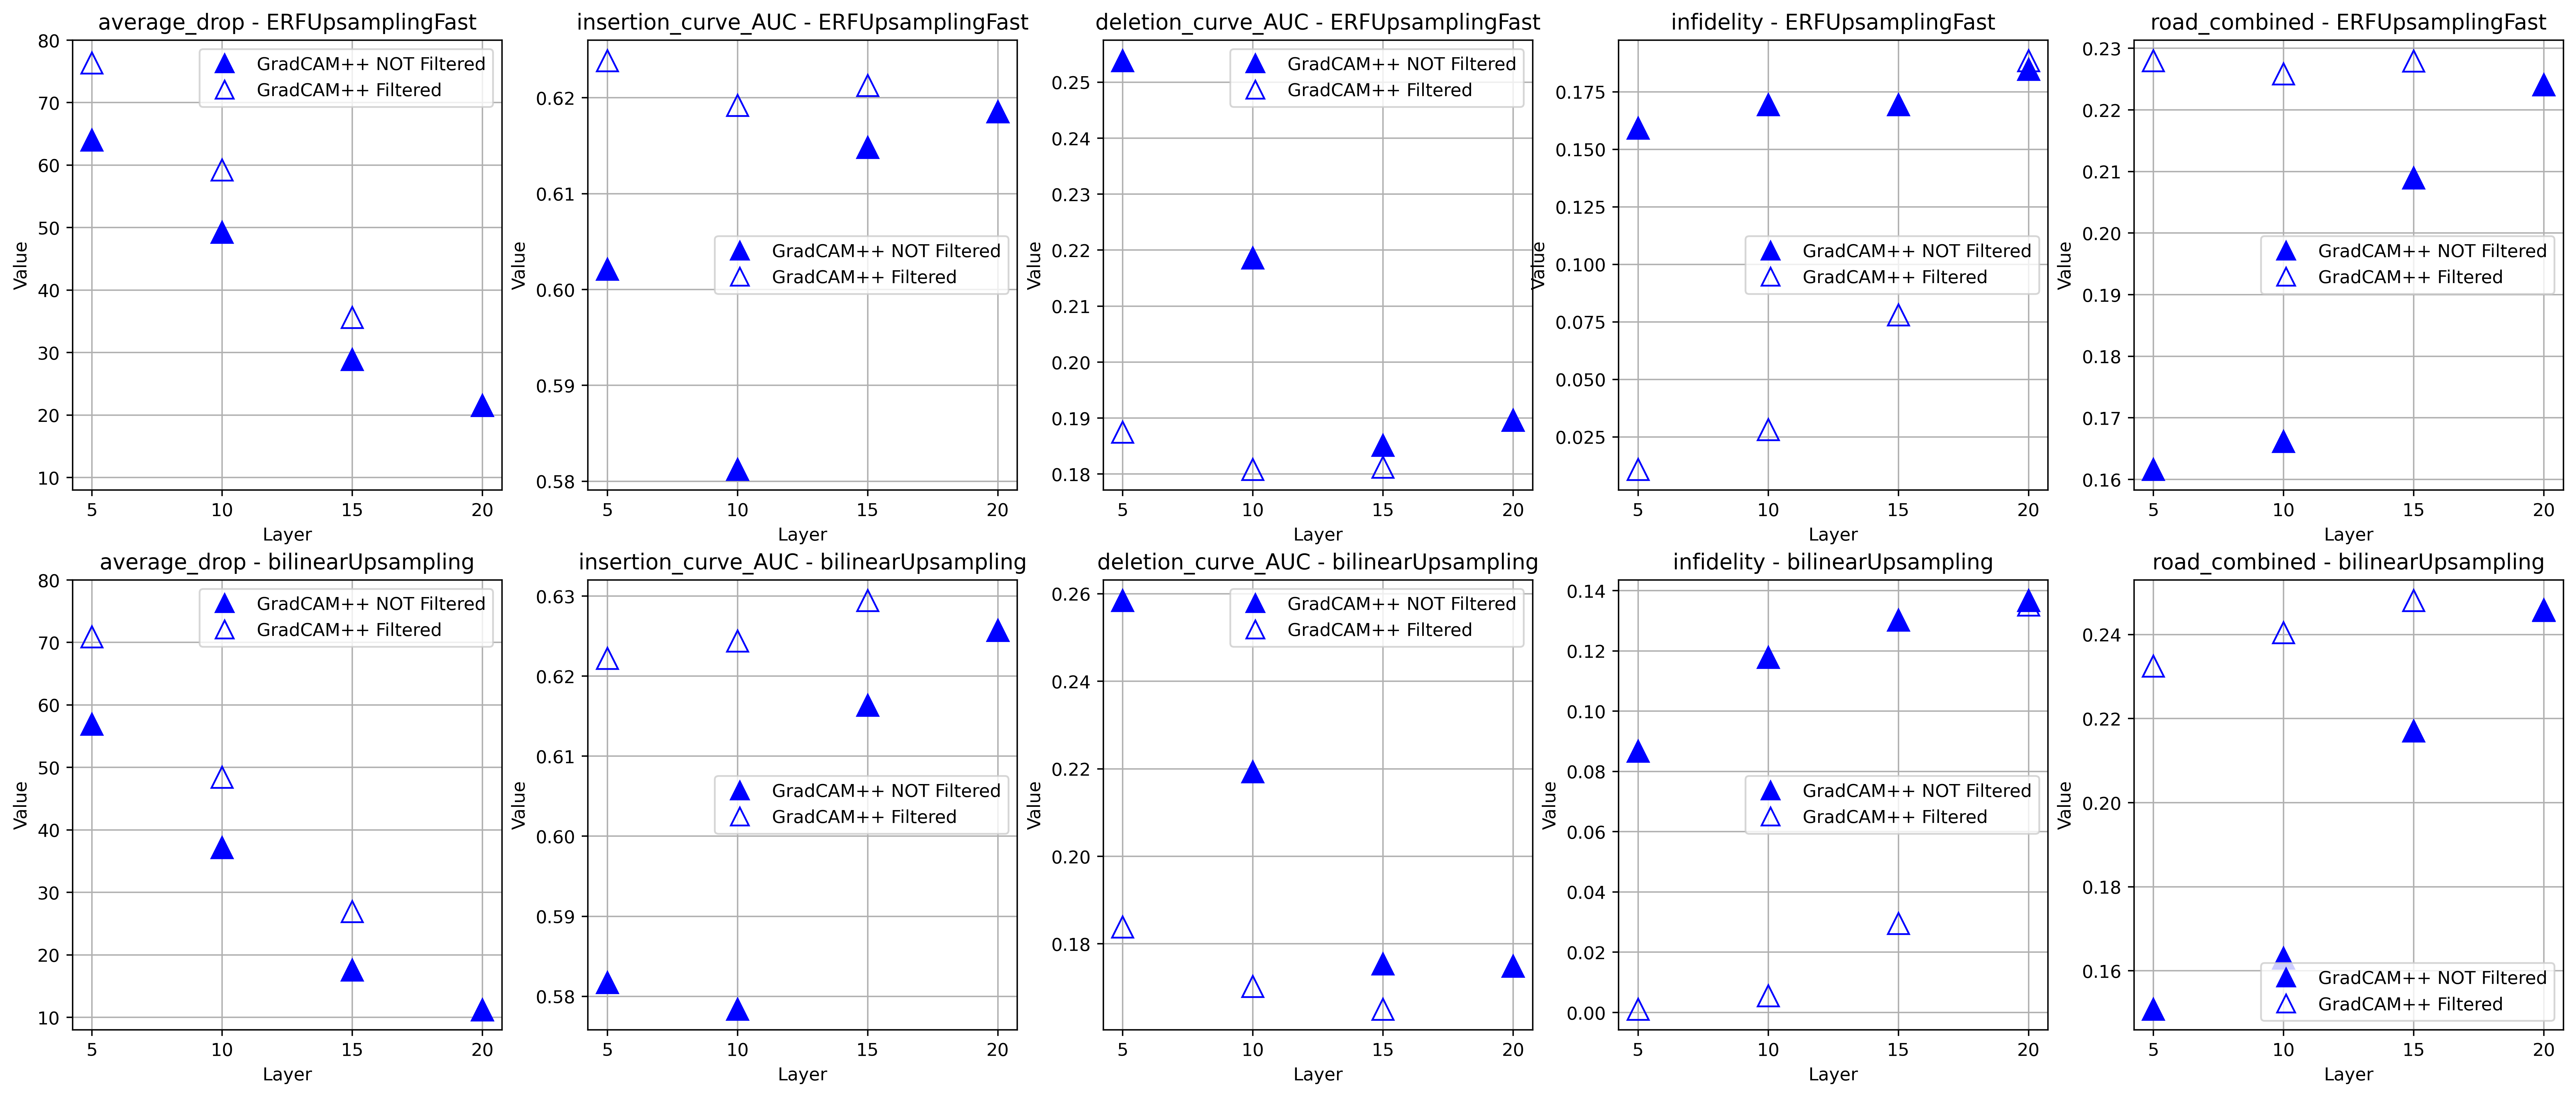

In [37]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
shape_for_methods = {"GradCAMPlusPlus": "^"}  # Define shape mapping

method_names = {"GradCAMPlusPlus": r"GradCAM++ NOT Filtered", "DeepLiftShap8": "DeepLiftShap Bilinear Upsampling"}  # Define shape mapping
# upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(25,10), dpi=400)

metric = "road_combined"
# fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

# plt.suptitle('Infidelity comparison between Filtered and NOT Filtered', fontsize=16)
plt.tight_layout()

for metric_index, metric in enumerate(metrics):
    df_metric = df[df["Metric"] == metric]
    # plt.subplot(3, 2,)
    for index, upscale in enumerate(upscale_methods):
        print(upscale)
        plt.subplot(2, 5, index * len(metrics) + metric_index + 1)
        plt.title(metric + " - " + upscale)
        for layer_type in types:
            for mix in mixing_methods:
                for j, attr_method in enumerate(methods):
                    res = df_metric[(df_metric["Upscale Method"] == upscale) &
                            (df_metric["Attribution Method"] == attr_method) & 
                            (df_metric["Mixing Method"] == mix)]
                    res = res.groupby("Layer").agg({"Value": ["mean","std","count"]}).reset_index()
                    res["Layer"] = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                    print(res.columns)
                
                    if mix == "MultiplierMix":
                        # print("SimpleUpsampling")
                        plt.plot(res["Layer"], res["Value","mean"],shape_for_methods[attr_method],markerfacecolor= 'none', color=color_for_layers[types.index(layer_type)], markersize=12)
                        # plt.errorbar(res["Layer"], res["Value","mean"], yerr=1.96 * res["Value","std"] / res["Value","count"], fmt='o', color=color_for_layers[types.index(layer_type)], markersize=2, capsize=2)
                    else:
                        plt.plot(res["Layer"], res["Value","mean"],shape_for_methods[attr_method], color=color_for_layers[types.index(layer_type)], markersize=12)
                        # plt.errorbar(res["Layer"], res["Value","mean"], yerr=1.96 * res["Value","std"] / res["Value","count"], fmt='o', color=color_for_layers[types.index(layer_type)], markersize=2, capsize=2)
                        # print("ERFUpsampling")

                    plt.xlabel("Layer")
                    plt.ylabel("Value")
                    # Log scale for y
                    if metric == "sensitivity":
                        plt.yscale("log")

                    # plt.ylim([0, 0.2])
                    if metric == "average_drop":
                        plt.ylim([8, 80])
                    # elif metric == "insertion_curve_AUC":
                    #     plt.ylim([0.65, 0.71])
                    # elif metric == "deletion_curve_AUC":
                    #     plt.ylim([0.25, 0.36])
                    plt.grid(True)


        # Create color legend (Layer Types)
        # color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
        #                 for color, layer in zip(color_for_layers, types)]
        color_legend = []

        # Create shape legend (Methods)
        shape_legend = [mlines.Line2D([], [], color='blue', marker=shape, linestyle='None', markersize=10, label=method_names[upscale]) 
                        for upscale, shape in shape_for_methods.items()]
        
        upscale_legend = [mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=10, label="GradCAM++ Filtered", markerfacecolor= 'none'),]
        
        plt.xticks([5,10,15,20])
        plt.legend(handles=color_legend + shape_legend + upscale_legend)

plt.savefig('results filter infidelity.pdf', dpi=400, bbox_inches='tight')


      Image Index  Label  Predicted Label  Model         Dataset  \
0               0      2                2  VGG11  Imagenettewoof   
1               0      2                2  VGG11  Imagenettewoof   
2               0      2                2  VGG11  Imagenettewoof   
3               0      2                2  VGG11  Imagenettewoof   
4               0      2                2  VGG11  Imagenettewoof   
...           ...    ...              ...    ...             ...   
7995          999     19               19  VGG11  Imagenettewoof   
7996          999     19               19  VGG11  Imagenettewoof   
7997          999     19               19  VGG11  Imagenettewoof   
7998          999     19               19  VGG11  Imagenettewoof   
7999          999     19               19  VGG11  Imagenettewoof   

     Attribution Method        Layer      Metric      Upscale Method  \
0       GradCAMPlusPlus  features.10  infidelity   ERFUpsamplingFast   
1       GradCAMPlusPlus  features.10  i

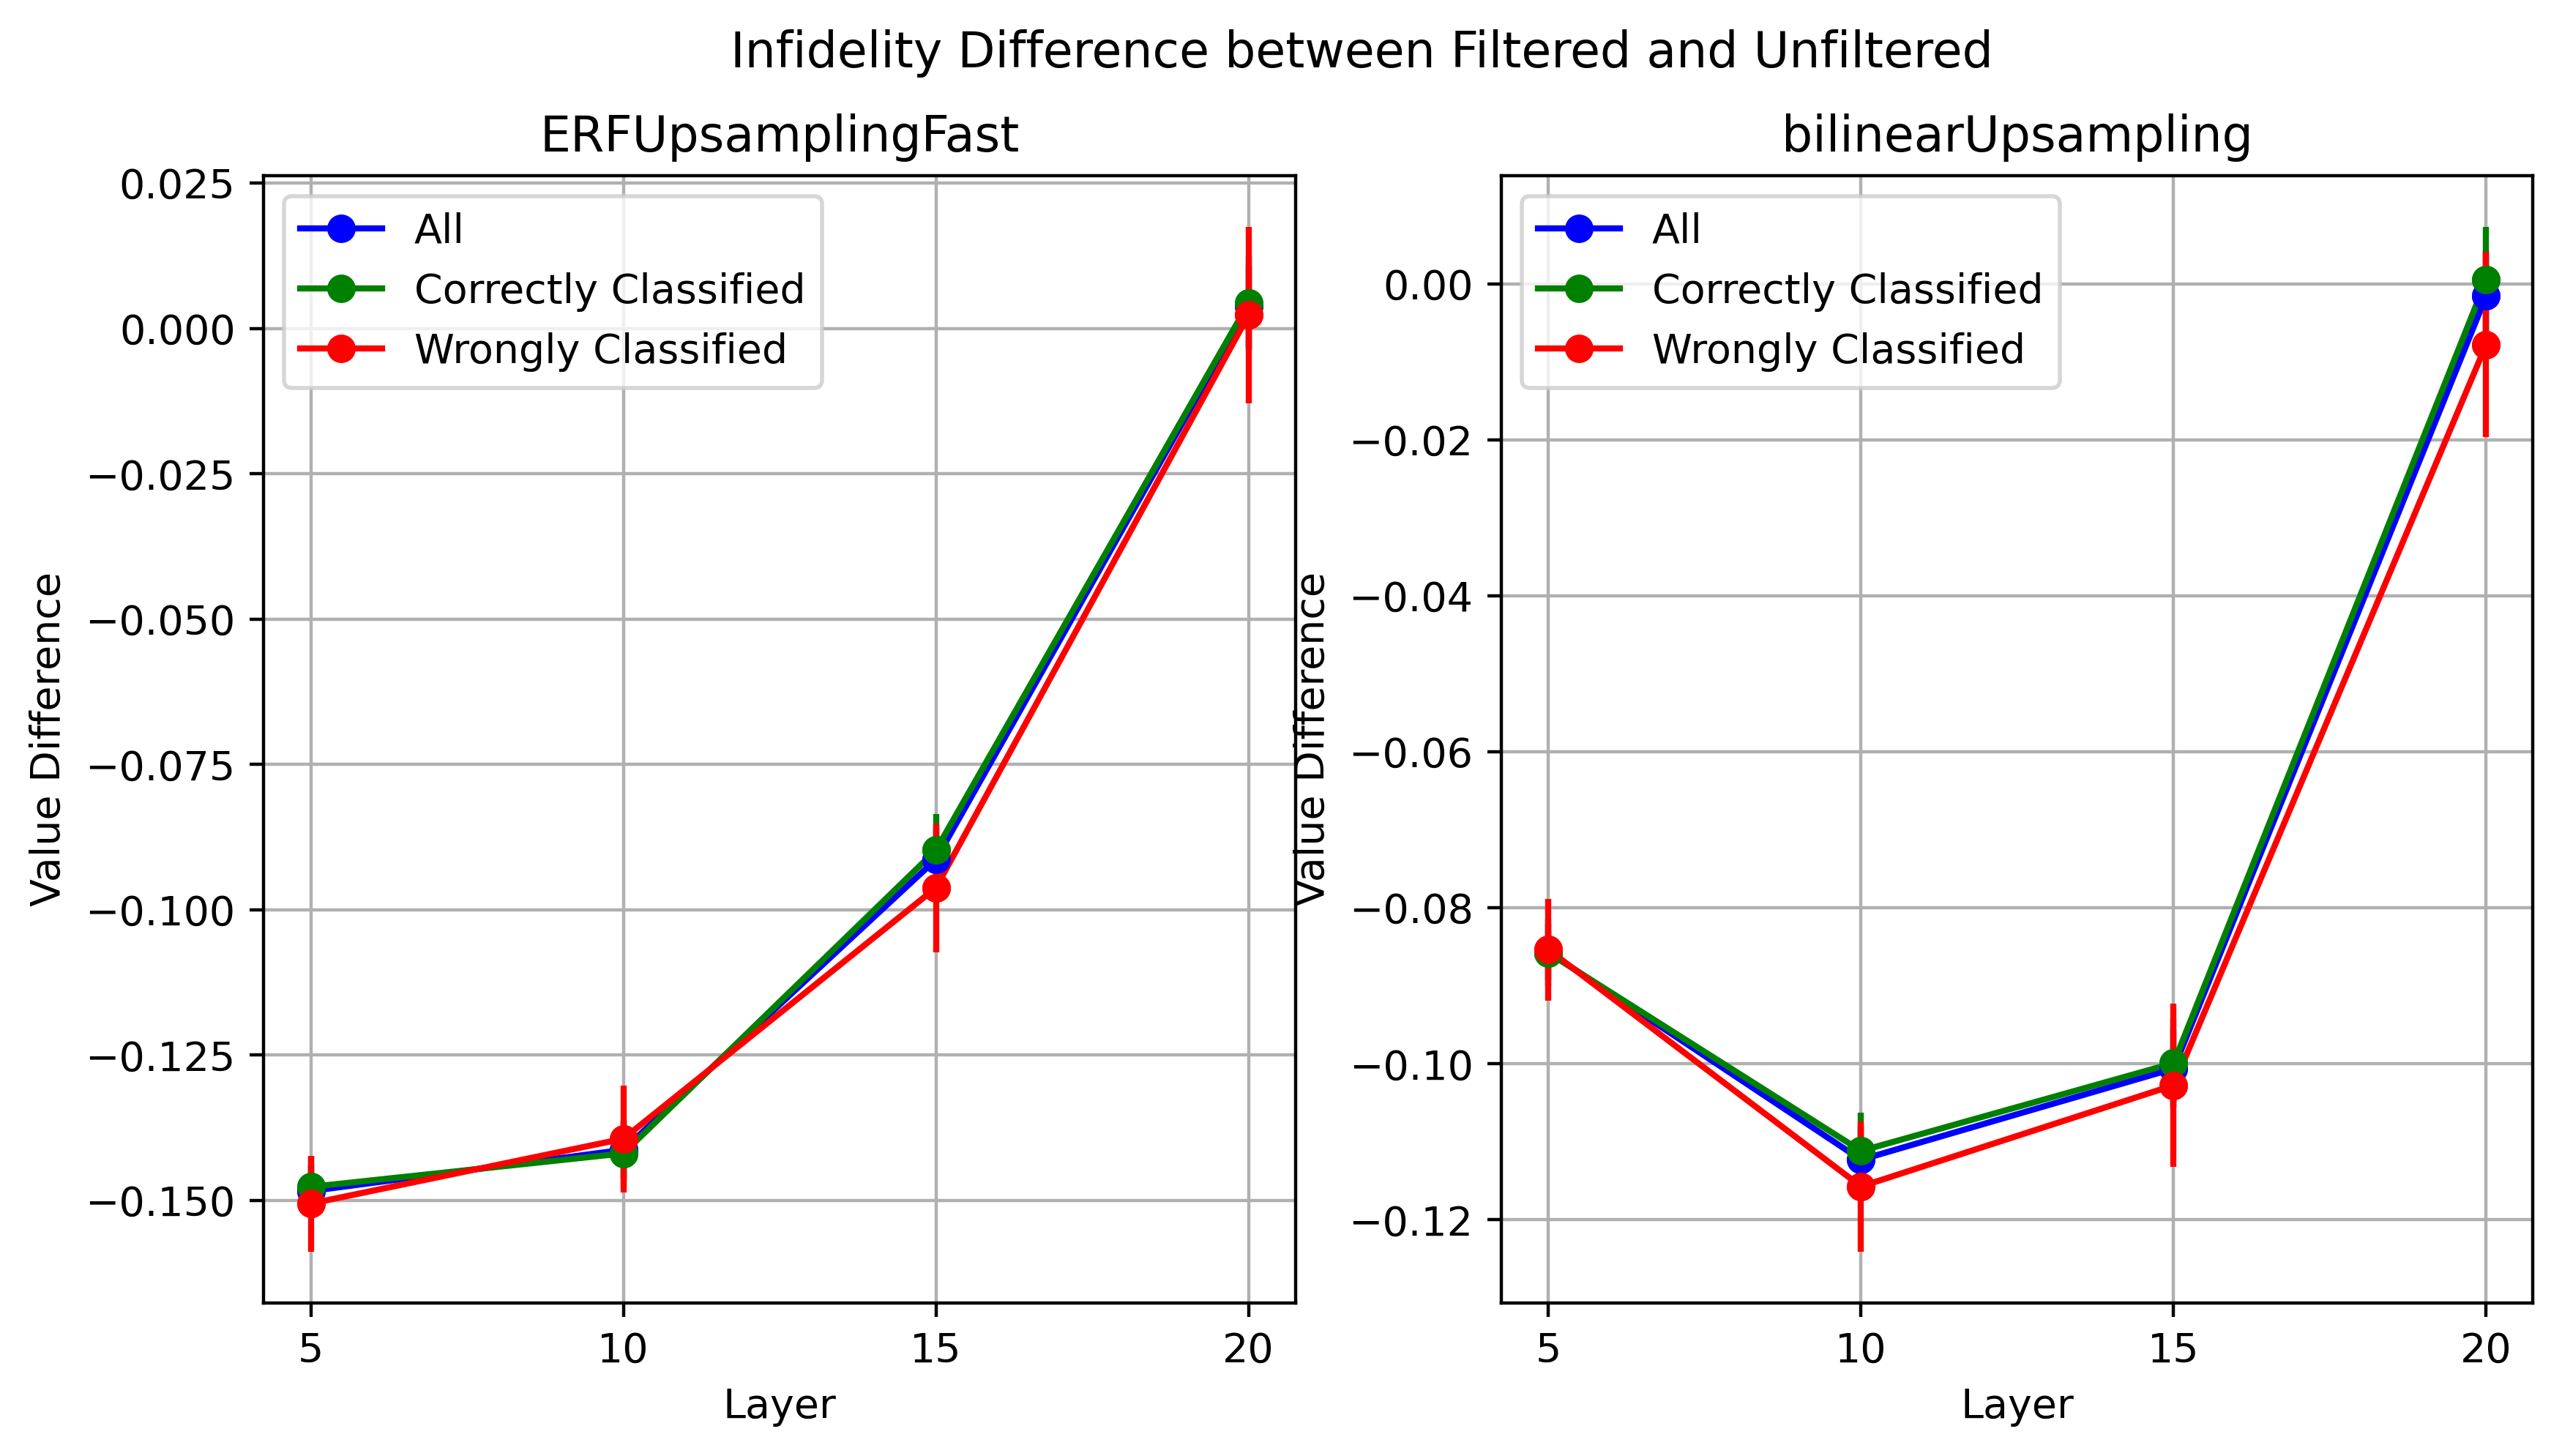

In [15]:
# Plot the grouped data showing also the 95% confidence interval
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import numpy as np


# Function to calculate the difference in 'Value' for each group
def calculate_difference(group):
    if len(group) == 2:
        # Assuming there are exactly two rows in each group with different 'Mixing Method'
        diff = group['Value'].diff().iloc[1]
        return pd.Series([diff], index=['Value Difference'])
    else:
        return pd.Series([None], index=['Value Difference'])


# Apply the function to each group and reset the index
# display(grouped)

plt.figure(figsize=(10,5), dpi=400)
plt.suptitle("Infidelity Difference between Filtered and Unfiltered")
# plt.xlabel("Layer")
# plt.ylabel("Value Difference")
# plt.xticks([5,10,15,20])
# plt.ylim([-0.1, 0.4])
# plt.grid(True)
# Plot data

grouped = df.groupby([col for col in df.columns if col not in ['Mixing Method', 'Value']])

df_correct = df[df["Predicted Label"] == df["Label"]]
grouped_correct = df_correct.groupby([col for col in df_correct.columns if col not in ['Mixing Method', 'Value']])

df_wrong = df[df["Predicted Label"] != df["Label"]]
grouped_wrong = df_wrong.groupby([col for col in df_wrong.columns if col not in ['Mixing Method', 'Value']])

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
labels = ['All', 'Correctly Classified', 'Wrongly Classified']

for index, upscale in enumerate(upscale_methods):
    plt.subplot(1, 2, index + 1)
    plt.title(upscale)
    plt.grid(True)
    plt.xlabel("Layer")
    plt.ylabel("Value Difference")
    # plt.ylim([-0.01, 0.12])
    plt.xticks([5,10,15,20])
    for index, d in enumerate([grouped, grouped_correct, grouped_wrong]): 
        d = d.apply(calculate_difference).reset_index()
        print(d)
        d = d[d["Upscale Method"] == upscale]        
        d = d.groupby(["Layer"]).agg({"Value Difference": ["mean","std", "count"]}).reset_index()
        d["Layer"] = d["Layer"].apply(lambda x: int(x.split(".")[-1]))
        d = d.sort_values(by="Layer")
        plt.plot(d["Layer"], d['Value Difference']['mean'], marker='o', label=labels[index], color=colors[index])
        for i, row in d.iterrows():
            layer = int(row['Layer'].values[0])
            mean_diff = row['Value Difference']['mean']
            std_diff = 1.96*row['Value Difference']['std'] / np.sqrt(row['Value Difference']['count'])

            # Plot the mean difference with error bars
            plt.errorbar(layer, mean_diff, yerr=std_diff, fmt='o', color=colors[index])

    plt.legend()

plt.savefig('results mixed difference infidelity.pdf', dpi=400, bbox_inches='tight')